In [1]:
#import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder

from sklearn.naive_bayes import GaussianNB


In [2]:
#read_csv
df = pd.read_csv('/Users/navamongkoltongta/OneDrive - Assumption University/Year2.2/Data Science/Project/vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#drop_unneccessary_column
df.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], inplace=True)

In [5]:
df.count()

Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
Global_Sales    16598
dtype: int64

In [6]:
df.dropna(how='any',subset=['Year','Publisher'],inplace=True)

In [7]:
df.drop(df[df.Year < 2010].index, inplace=True)

In [8]:
df[df['Publisher'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales


In [9]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

In [10]:
df.count()

Rank            5134
Name            5134
Platform        5134
Year            5134
Genre           5134
Publisher       5134
Global_Sales    5134
dtype: int64

In [11]:
df.describe()

,Rank,Year,Global_Sales
count,5134.000000,5134.000000,5134.000000
mean,8903.949357,2012.251071,0.490923
std,4914.303885,1.966175,1.242906
min,16.000000,2010.000000,0.010000
25%,4680.250000,2011.000000,0.050000
50%,9246.000000,2012.000000,0.140000
75%,13335.500000,2014.000000,0.410000
max,16599.000000,2020.000000,21.820000


In [12]:
## create new column level of global sales
df.loc[df['Global_Sales'].between(0.42,22), 'Sales_level'] = 4
df.loc[df['Global_Sales'].between(0.15,0.41), 'Sales_level'] = 3
df.loc[df['Global_Sales'].between(0.05,0.14), 'Sales_level'] = 2
df.loc[df['Global_Sales'] <= 0.05, 'Sales_level'] = 1

df.head(5)


,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,Sales_level
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,21.82,4.0
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,21.40,4.0
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,16.38,4.0
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,15.32,4.0
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,14.76,4.0


In [13]:
df.Sales_level.value_counts()

1.0    1447
4.0    1283
3.0    1221
2.0    1183
Name: Sales_level, dtype: int64

In [14]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
Sales_level     0
dtype: int64

In [15]:
#See all Genre
df.Genre.value_counts()

Action          1438
Sports           570
Misc             563
Role-Playing     557
Adventure        542
Shooter          395
Racing           233
Simulation       207
Fighting         197
Strategy         167
Platform         150
Puzzle           115
Name: Genre, dtype: int64

In [16]:
#See all Platform
df.Platform.value_counts()

PS3     886
X360    681
DS      513
PSP     500
3DS     499
PC      456
Wii     452
PSV     410
PS4     336
XOne    213
WiiU    143
PS2      45
Name: Platform, dtype: int64

In [17]:
#Sort platform to num
df.loc[df['Platform'] == 'DS', 'PlatformId'] = 1 
df.loc[df['Platform'] == 'PS2', 'PlatformId'] = 2
df.loc[df['Platform'] == 'PS3', 'PlatformId'] = 3 
df.loc[df['Platform'] == 'Wii', 'PlatformId'] = 4 
df.loc[df['Platform'] == 'X360', 'PlatformId'] = 5 
df.loc[df['Platform'] == 'PSP', 'PlatformId'] = 6 
df.loc[df['Platform'] == 'PS', 'PlatformId'] = 7 
df.loc[df['Platform'] == 'PC', 'PlatformId'] = 8 
df.loc[df['Platform'] == 'XB', 'PlatformId'] = 9
df.loc[df['Platform'] == 'GBA', 'PlatformId'] = 10
df.loc[df['Platform'] == 'GC', 'PlatformId'] = 11
df.loc[df['Platform'] == '3DS', 'PlatformId'] = 12
df.loc[df['Platform'] == 'PSV', 'PlatformId'] = 13
df.loc[df['Platform'] == 'PS4', 'PlatformId'] = 14
df.loc[df['Platform'] == 'N64', 'PlatformId'] = 15
df.loc[df['Platform'] == 'SNES', 'PlatformId'] = 16
df.loc[df['Platform'] == 'XOne', 'PlatformId'] = 17
df.loc[df['Platform'] == 'SAT', 'PlatformId'] = 18
df.loc[df['Platform'] == 'WiiU', 'PlatformId'] = 19
df.loc[df['Platform'] == '2600', 'PlatformId'] = 20
df.loc[df['Platform'] == 'NES', 'PlatformId'] = 21
df.loc[df['Platform'] == 'GB', 'PlatformId'] = 22
df.loc[df['Platform'] == 'DC', 'PlatformId'] = 23
df.loc[df['Platform'] == 'GEN', 'PlatformId'] = 24
df.loc[df['Platform'] == 'NG', 'PlatformId'] = 25
df.loc[df['Platform'] == 'SCD', 'PlatformId'] = 26
df.loc[df['Platform'] == 'WS', 'PlatformId'] = 27
df.loc[df['Platform'] == '3DO', 'PlatformId'] = 28
df.loc[df['Platform'] == 'TG16', 'PlatformId'] = 29
df.loc[df['Platform'] == 'GG', 'PlatformId'] = 30
df.loc[df['Platform'] == 'PCFX', 'PlatformId'] = 31

df.sample(10)


,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,Sales_level,PlatformId
12416,12418,MotoGP 10/11,X360,2011.0,Racing,Capcom,0.06,2.0,5.0
7290,7292,Code Name: S.T.E.A.M.,3DS,2015.0,Strategy,Nintendo,0.22,3.0,12.0
2800,2802,F1 2011,X360,2011.0,Racing,Codemasters,0.73,4.0,5.0
10768,10770,NASCAR Unleashed,PS3,2011.0,Racing,Activision,0.10,2.0,3.0
13057,13059,Men of War: Assault Squad,PC,2011.0,Strategy,1C Company,0.05,1.0,8.0
8673,8675,Guilty Gear Xrd: Sign,PS4,2014.0,Fighting,Arc System Works,0.16,3.0,14.0
10519,10521,God Eater 2: Rage Burst,PS4,2015.0,Role-Playing,Namco Bandai Games,0.10,2.0,14.0
9298,9300,Kamen Rider Battle: Ganbaride,DS,2010.0,Strategy,Namco Bandai Games,0.14,2.0,1.0
7649,7651,Pro Yaky? Spirits 2013,PS3,2013.0,Sports,Konami Digital Entertainment,0.20,3.0,3.0
2160,2162,Lost Planet 2,PS3,2010.0,Shooter,Capcom,0.96,4.0,3.0


In [18]:
#Sort Genre to num
df.loc[df['Genre'] == 'Action', 'GenreId'] = 1 
df.loc[df['Genre'] == 'Sports', 'GenreId'] = 2
df.loc[df['Genre'] == 'Shooter', 'GenreId'] = 3 
df.loc[df['Genre'] == 'Role-Playing', 'GenreId'] = 4 
df.loc[df['Genre'] == 'Misc', 'GenreId'] = 5 
df.loc[df['Genre'] == 'Racing', 'GenreId'] = 6 
df.loc[df['Genre'] == 'Platform', 'GenreId'] = 7 
df.loc[df['Genre'] == 'Fighting', 'GenreId'] = 8 
df.loc[df['Genre'] == 'Simulation', 'GenreId'] = 9 
df.loc[df['Genre'] == 'Puzzle', 'GenreId'] = 10 
df.loc[df['Genre'] == 'Adventure', 'GenreId'] = 11 
df.loc[df['Genre'] == 'Strategy', 'GenreId'] = 12 

df.sample(10)



,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,Sales_level,PlatformId,GenreId
8286,8288,Despicable Me: The Game,PSP,2010.0,Platform,D3Publisher,0.17,3.0,6.0,7.0
2965,2967,Nintendo Presents: New Style Boutique 2 - Fash...,3DS,2015.0,Misc,Nintendo,0.69,4.0,12.0,5.0
12998,13000,Lucha Libre AAA: Heroes del Ring,X360,2010.0,Fighting,Konami Digital Entertainment,0.05,1.0,5.0,8.0
14344,14347,Atelier Sophie: The Alchemist of the Mysteriou...,PS3,2015.0,Role-Playing,Tecmo Koei,0.03,1.0,3.0,4.0
14857,14860,Little Busters! Converted Edition,PSV,2012.0,Action,Prototype,0.03,1.0,13.0,1.0
5419,5421,Zoo Tycoon (2013),XOne,2013.0,Simulation,Microsoft Game Studios,0.34,3.0,17.0,9.0
1698,1700,FIFA 14,XOne,2013.0,Sports,Electronic Arts,1.19,4.0,17.0,2.0
13698,13700,Gakuen Hetalia Portable,PSP,2011.0,Adventure,Idea Factory,0.04,1.0,6.0,11.0
1548,1550,Kid Icarus: Uprising,3DS,2012.0,Action,Nintendo,1.28,4.0,12.0,1.0
5929,5931,Dragon Quest Builders: Revive Alefgard,PSV,2016.0,Role-Playing,Square Enix,0.30,3.0,13.0,4.0


In [19]:
#Define X and Y
inputs = df.drop('Sales_level',axis='columns')
target = df.Sales_level

In [20]:
#Drop unused column
inputs.drop(['Year','Rank','Name','Platform','Publisher','Genre','Global_Sales'],axis='columns',inplace=True)
inputs.head()

,PlatformId,GenreId
15,5.0,5.0
16,3.0,1.0
23,5.0,1.0
26,1.0,4.0
29,5.0,3.0


In [21]:
#Define X and Y
X = inputs.astype(int)
Y = target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
model = GaussianNB()

In [22]:
X_test[0:10]

,PlatformId,GenreId
7665,13,6
3625,3,1
3727,5,2
1942,5,1
5561,13,1
7034,6,2
8138,8,3
8354,14,2
460,4,7
758,14,3


In [23]:
model.fit(X_train,y_train)

GaussianNB()

In [24]:
model.score(X_test,y_test)

0.33982473222979553

In [25]:
model.predict(X_test[0:10])

array([1, 4, 4, 4, 4, 4, 4, 4, 1, 4])

In [26]:
model.predict_proba(X_test[:10])

array([[0.29535075, 0.23587317, 0.22359999, 0.24517609],
       [0.1768964 , 0.21880428, 0.27654834, 0.32775098],
       [0.18821396, 0.21511062, 0.26819055, 0.32848486],
       [0.1893523 , 0.21606815, 0.27169961, 0.32287994],
       [0.2153717 , 0.21140155, 0.23122686, 0.34199989],
       [0.19366867, 0.21397402, 0.2649082 , 0.32744911],
       [0.20932007, 0.21462623, 0.25490193, 0.32115177],
       [0.21382037, 0.2103213 , 0.22116147, 0.35469686],
       [0.29323491, 0.25451156, 0.26262142, 0.18963211],
       [0.22062826, 0.21275626, 0.21960212, 0.34701336]])

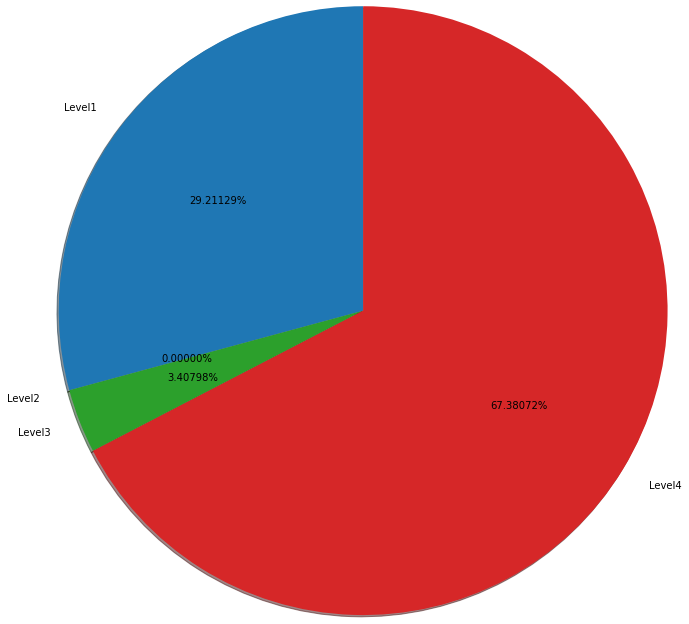

[29.211295034079843, 0.0, 3.4079844206426486, 67.38072054527751]


In [27]:
x = model.predict_proba(X_test)
level = []
for i in x:
    # print(max(i))
    listi = i.tolist()
    maxi = max(i).tolist()
    maxindex = listi.index(maxi)
    level.append(maxindex)

result = []
for i in range(4):
    x = level.count(i)
    percent = (x/len(level))*100
    result.append(percent)
# print(level)
# print(result)
label = ["Level1","Level2","Level3","Level4"]
plt.axis("equal")
plt.pie(result, labels=label, radius=3.5, autopct='%0.5f%%', explode=[0.0,0.0,0.0,0.0], startangle=90,shadow=True)
plt.show()
print(result)


In [28]:
import csv

x = model.predict_proba(X_test)
level = []
prob = []
for i in x:
    # print(max(i))
    listi = i.tolist()
    maxi = max(i).tolist()
    maxindex = listi.index(maxi)
    level.append(maxindex)
    prob.append(max(i))
    
# result = []
# i = X_test
# count = 1
# for idx, j in i.iterrows():
#     subresult = []
#     subresult.append(count)
#     subresult.append(j[0])
#     subresult.append(j[1])
#     subresult.append(level[count-1])
#     subresult.append(prob[count-1])
#     result.append(subresult)
#     count += 1
# print(result)

result = []
i = X_test
count = 1
for idx, j in i.iterrows():
    subresult = []
    if level[count-1] >= 0:
        subresult.append(count)
        subresult.append(j[0])
        subresult.append(j[1])
        subresult.append(level[count-1]+1)
        subresult.append(prob[count-1])
        result.append(subresult)
    count += 1
print(result)

df = pd.DataFrame(result, columns= ['id', 'PlatformId','GenreId','Level','Probability'])

df.to_csv (r'/Users/navamongkoltongta/OneDrive - Assumption University/Year2.2/Data Science/Project/RecommendResult.csv', index = False, header=True)




[[1, 13, 6, 1, 0.295350747986067], [2, 3, 1, 4, 0.32775097535584186], [3, 5, 2, 4, 0.32848486223582096], [4, 5, 1, 4, 0.32287993937105447], [5, 13, 1, 4, 0.3419998865112339], [6, 6, 2, 4, 0.32744911217421113], [7, 8, 3, 4, 0.32115177135240697], [8, 14, 2, 4, 0.354696856033148], [9, 4, 7, 1, 0.29323490778166017], [10, 14, 3, 4, 0.3470133580919101], [11, 5, 1, 4, 0.32287993937105447], [12, 4, 9, 1, 0.400553369202963], [13, 8, 9, 1, 0.4340601233840293], [14, 13, 1, 4, 0.3419998865112339], [15, 14, 1, 4, 0.34896888551672445], [16, 17, 1, 4, 0.3764794955842022], [17, 1, 1, 4, 0.33639451982301316], [18, 5, 1, 4, 0.32287993937105447], [19, 5, 1, 4, 0.32287993937105447], [20, 5, 2, 4, 0.32848486223582096], [21, 6, 8, 1, 0.3598281410198052], [22, 3, 3, 4, 0.32652522980301196], [23, 1, 5, 4, 0.285530382524152], [24, 6, 1, 4, 0.32186100704395787], [25, 17, 1, 4, 0.3764794955842022], [26, 5, 6, 3, 0.2640697647965269], [27, 6, 8, 1, 0.3598281410198052], [28, 13, 1, 4, 0.3419998865112339], [29, 3, 3

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.30656934, 0.33211679, 0.33252132, 0.33373934, 0.31790499])